<div class="alert alert-block alert-success"> <strong></strong><h1 align="center">Machine Learning in Python</h1> <h3 align="center">Google Play Store EDA</h3> </div>

<img src = "https://www.cyclonis.com/images/2020/03/googleplay.jpg" width=50%>

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sys
!{sys.executable} -m pip install pandas-profiling

  Using cached MarkupSafe-2.1.1-cp39-cp39-win_amd64.whl (17 kB)
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.0.1
    Uninstalling MarkupSafe-2.0.1:
      Successfully uninstalled MarkupSafe-2.0.1


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\ASUS\\anaconda3\\Lib\\site-packages\\~4rkupsafe\\_speedups.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
pip install MarkupSafe==2.0.1

  Using cached MarkupSafe-2.0.1-cp39-cp39-win_amd64.whl (14 kB)
  Attempting uninstall: MarkupSafe
    Found existing installation: MarkupSafe 2.1.1
    Uninstalling MarkupSafe-2.1.1:
      Successfully uninstalled MarkupSafe-2.1.1
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-project 0.10.1 requires ruamel-yaml, which is not installed.
pandas-profiling 3.2.0 requires markupsafe~=2.1.1, but you have markupsafe 2.0.1 which is incompatible.


## Load and Prepare Data

In [4]:
googleplaystore_data = pd.read_csv("googleplaystore.csv")
googleplaystore_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
import pandas_profiling
pandas_profiling.ProfileReport(googleplaystore_data)

Summarize dataset:   0%|          | 0/27 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
googleplaystore_data.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
6363,Read it easy for BK,LIFESTYLE,5.0,1,3.2M,50+,Free,0,Everyone,Lifestyle,"July 15, 2018",1.2,4.1 and up
3405,HD Widgets,PERSONALIZATION,4.3,58617,26M,"1,000,000+",Paid,$0.99,Everyone,Personalization,"December 7, 2016",4.3.2,4.4 and up
6749,BSC IT,FAMILY,4.4,847,21M,"10,000+",Free,0,Everyone,Education,"July 16, 2018",2.3,4.0.3 and up
7792,Jetting for Honda CR dirt bike,SPORTS,4.1,7,3.4M,100+,Paid,$3.49,Everyone,Sports,"April 13, 2016",2.2,3.0 and up
5537,Houzz Interior Design Ideas,HOUSE_AND_HOME,4.6,353813,Varies with device,"10,000,000+",Free,0,Everyone,House & Home,"August 1, 2018",Varies with device,Varies with device


In [7]:
googleplaystore_data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [8]:
googleplaystore_data=googleplaystore_data.dropna()

In [9]:
type(googleplaystore_data)

pandas.core.frame.DataFrame

In [10]:
googleplaystore_data.shape

(9360, 13)

In [11]:
googleplaystore_data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [12]:
googleplaystore_data.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [13]:
type(googleplaystore_data['Rating'][0])

numpy.float64

In [14]:
googleplaystore_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   object 
 4   Size            9360 non-null   object 
 5   Installs        9360 non-null   object 
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   object 
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1.3+ MB


## EDA (Use Pandas)

In [15]:
googleplaystore_data['Rating'].value_counts()

4.4    1108
4.3    1076
4.5    1037
4.2     951
4.6     823
4.1     707
4.0     567
4.7     499
3.9     386
3.8     303
5.0     274
3.7     239
4.8     234
3.6     174
3.5     163
3.4     128
3.3     102
4.9      87
3.0      83
3.1      69
3.2      63
2.9      45
2.8      42
2.7      25
2.6      25
2.5      21
2.3      20
2.4      19
1.0      16
2.2      14
1.9      13
2.0      12
1.7       8
1.8       8
2.1       8
1.6       4
1.4       3
1.5       3
1.2       1
Name: Rating, dtype: int64

In [16]:
googleplaystore_data['Category'].value_counts()

FAMILY                 1746
GAME                   1097
TOOLS                   733
PRODUCTIVITY            351
MEDICAL                 350
COMMUNICATION           328
FINANCE                 323
SPORTS                  319
PHOTOGRAPHY             317
LIFESTYLE               314
PERSONALIZATION         312
BUSINESS                303
HEALTH_AND_FITNESS      297
SOCIAL                  259
SHOPPING                238
NEWS_AND_MAGAZINES      233
TRAVEL_AND_LOCAL        226
DATING                  195
BOOKS_AND_REFERENCE     178
VIDEO_PLAYERS           160
EDUCATION               155
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     124
FOOD_AND_DRINK          109
HOUSE_AND_HOME           76
WEATHER                  75
AUTO_AND_VEHICLES        73
LIBRARIES_AND_DEMO       64
ART_AND_DESIGN           61
COMICS                   58
PARENTING                50
EVENTS                   45
BEAUTY                   42
Name: Category, dtype: int64

In [17]:
googleplaystore_data['Content Rating'].value_counts(normalize=True)* 100

Everyone           79.209402
Teen               11.581197
Mature 17+          4.925214
Everyone 10+        4.241453
Adults only 18+     0.032051
Unrated             0.010684
Name: Content Rating, dtype: float64

In [18]:
googleplaystore_data['Installs'].value_counts(normalize=True)* 100

1,000,000+        16.837607
10,000,000+       13.376068
100,000+          12.286325
10,000+           10.779915
5,000,000+         8.034188
1,000+             7.606838
500,000+           5.737179
50,000+            4.978632
5,000+             4.604701
100,000,000+       4.369658
100+               3.301282
50,000,000+        3.087607
500+               2.147436
500,000,000+       0.769231
10+                0.737179
1,000,000,000+     0.619658
50+                0.598291
5+                 0.096154
1+                 0.032051
Name: Installs, dtype: float64

In [19]:
googleplaystore_data['Type'].value_counts(normalize=True)* 100

Free    93.108974
Paid     6.891026
Name: Type, dtype: float64

In [20]:
pd.crosstab(googleplaystore_data.Category,googleplaystore_data.Installs)

Installs,1+,"1,000+","1,000,000+","1,000,000,000+",10+,"10,000+","10,000,000+",100+,"100,000+","100,000,000+",5+,"5,000+","5,000,000+",50+,"50,000+","50,000,000+",500+,"500,000+","500,000,000+"
Category,,,,,,,,,,,,,,,,,,,
ART_AND_DESIGN,0,3,4,0,0,11,5,1,18,0,0,3,3,0,6,1,0,6,0
AUTO_AND_VEHICLES,0,8,13,0,0,6,2,3,23,0,0,2,3,0,5,0,3,5,0
BEAUTY,0,1,8,0,0,10,1,2,6,0,0,3,1,0,4,0,0,6,0
BOOKS_AND_REFERENCE,0,25,20,1,0,24,24,1,19,6,1,15,10,1,11,0,3,17,0
BUSINESS,0,39,46,0,6,45,18,24,36,3,2,14,23,3,12,7,13,12,0
COMICS,0,1,12,0,0,11,2,1,11,0,0,5,4,0,6,0,0,5,0
COMMUNICATION,0,12,45,19,3,24,57,14,19,39,0,17,25,2,10,10,6,9,17
DATING,0,10,32,0,1,27,17,11,37,0,0,12,9,0,5,0,8,26,0
EDUCATION,0,2,52,0,0,5,30,0,20,4,0,0,22,0,6,0,0,14,0


In [21]:
pd.crosstab(googleplaystore_data.Category,googleplaystore_data.Type, normalize = "index" )

Type,Free,Paid
Category,,
ART_AND_DESIGN,0.950820,0.049180
AUTO_AND_VEHICLES,0.986301,0.013699
BEAUTY,1.000000,0.000000
BOOKS_AND_REFERENCE,0.955056,0.044944
BUSINESS,0.963696,0.036304
COMICS,1.000000,0.000000
COMMUNICATION,0.932927,0.067073
DATING,0.979487,0.020513
EDUCATION,0.974194,0.025806


In [22]:
googleplaystore_data[['Category','Type','Rating']][10091:]

,Category,Type,Rating


In [23]:
Rates_above_4= googleplaystore_data[ googleplaystore_data.Rating >= 4]

In [24]:
Rates_above_4[0:6]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up


In [25]:
len(Rates_above_4)

7363

In [26]:
googleplaystore_data[googleplaystore_data.Rating >= 4][["Installs","Type","Category"]]

,Installs,Type,Category
0,"10,000+",Free,ART_AND_DESIGN
2,"5,000,000+",Free,ART_AND_DESIGN
3,"50,000,000+",Free,ART_AND_DESIGN
4,"100,000+",Free,ART_AND_DESIGN
5,"50,000+",Free,ART_AND_DESIGN
...,...,...,...
10834,500+,Free,FAMILY
10836,"5,000+",Free,FAMILY
10837,100+,Free,FAMILY
10839,"1,000+",Free,BOOKS_AND_REFERENCE


In [27]:
googleplaystore_data[googleplaystore_data.Rating >= 4]["Type"].value_counts()

Free    6839
Paid     524
Name: Type, dtype: int64

In [28]:
googleplaystore_data[googleplaystore_data.Rating >= 4]["Type"].value_counts(normalize = True)

Free    0.928833
Paid    0.071167
Name: Type, dtype: float64

In [29]:
googleplaystore_data[googleplaystore_data.Rating >= 4]["Category"].value_counts()

FAMILY                 1338
GAME                    948
TOOLS                   504
PRODUCTIVITY            291
PERSONALIZATION         280
COMMUNICATION           268
MEDICAL                 266
SPORTS                  265
PHOTOGRAPHY             264
HEALTH_AND_FITNESS      251
FINANCE                 246
SOCIAL                  224
BUSINESS                223
LIFESTYLE               213
SHOPPING                207
NEWS_AND_MAGAZINES      173
TRAVEL_AND_LOCAL        165
EDUCATION               149
BOOKS_AND_REFERENCE     149
DATING                  126
ENTERTAINMENT           108
VIDEO_PLAYERS           105
MAPS_AND_NAVIGATION      84
FOOD_AND_DRINK           82
HOUSE_AND_HOME           59
WEATHER                  59
AUTO_AND_VEHICLES        55
ART_AND_DESIGN           55
LIBRARIES_AND_DEMO       48
EVENTS                   42
PARENTING                41
COMICS                   40
BEAUTY                   35
Name: Category, dtype: int64

In [30]:
googleplaystore_data.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [31]:
googleplaystore_data.groupby('Category')['Rating'].mean()

Category
ART_AND_DESIGN         4.377049
AUTO_AND_VEHICLES      4.190411
BEAUTY                 4.278571
BOOKS_AND_REFERENCE    4.346067
BUSINESS               4.121452
COMICS                 4.155172
COMMUNICATION          4.158537
DATING                 3.970769
EDUCATION              4.389032
ENTERTAINMENT          4.126174
EVENTS                 4.435556
FAMILY                 4.192383
FINANCE                4.131889
FOOD_AND_DRINK         4.166972
GAME                   4.286326
HEALTH_AND_FITNESS     4.277104
HOUSE_AND_HOME         4.197368
LIBRARIES_AND_DEMO     4.179688
LIFESTYLE              4.094904
MAPS_AND_NAVIGATION    4.051613
MEDICAL                4.189143
NEWS_AND_MAGAZINES     4.132189
PARENTING              4.300000
PERSONALIZATION        4.335256
PHOTOGRAPHY            4.192114
PRODUCTIVITY           4.211396
SHOPPING               4.259664
SOCIAL                 4.255598
SPORTS                 4.223511
TOOLS                  4.047203
TRAVEL_AND_LOCAL       4.109292

In [32]:
googleplaystore_data.sort_values('Rating',ascending=False)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1038,Mindvalley U Tallinn 2018,EVENTS,5.0,1,21M,100+,Free,0,Everyone,Events,"July 3, 2018",1.0.5,4.4 and up
9517,Ek Vote,PRODUCTIVITY,5.0,43,6.2M,500+,Free,0,Everyone,Productivity,"November 7, 2017",1.1,4.0.3 and up
9427,ei Calc,TOOLS,5.0,2,19M,10+,Free,0,Everyone,Tools,"October 12, 2015",1.2.2,2.3 and up
7367,"Startupticker.ch News, Events",NEWS_AND_MAGAZINES,5.0,4,10M,100+,Free,0,Everyone,News & Magazines,"July 23, 2018",2.0.0,4.4 and up
9444,"Kolkata News:Anandbazar Patrika,ei samay&AllRa...",NEWS_AND_MAGAZINES,5.0,10,5.0M,100+,Free,0,Everyone,News & Magazines,"July 14, 2018",1.0,4.0.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7427,CJ DVD Rentals,COMMUNICATION,1.0,5,13M,100+,Free,0,Everyone,Communication,"October 6, 2017",1.0,4.1 and up
10591,Lottery Ticket Checker - Florida Results & Lotto,TOOLS,1.0,3,41M,500+,Free,0,Everyone,Tools,"December 12, 2017",1.0,4.2 and up
7383,Thistletown CI,PRODUCTIVITY,1.0,1,6.6M,100+,Free,0,Everyone,Productivity,"March 15, 2018",41.9,4.1 and up
7144,CB Mobile Biz,FINANCE,1.0,3,8.4M,500+,Free,0,Everyone,Finance,"February 22, 2016",4.4.1255,4.0 and up


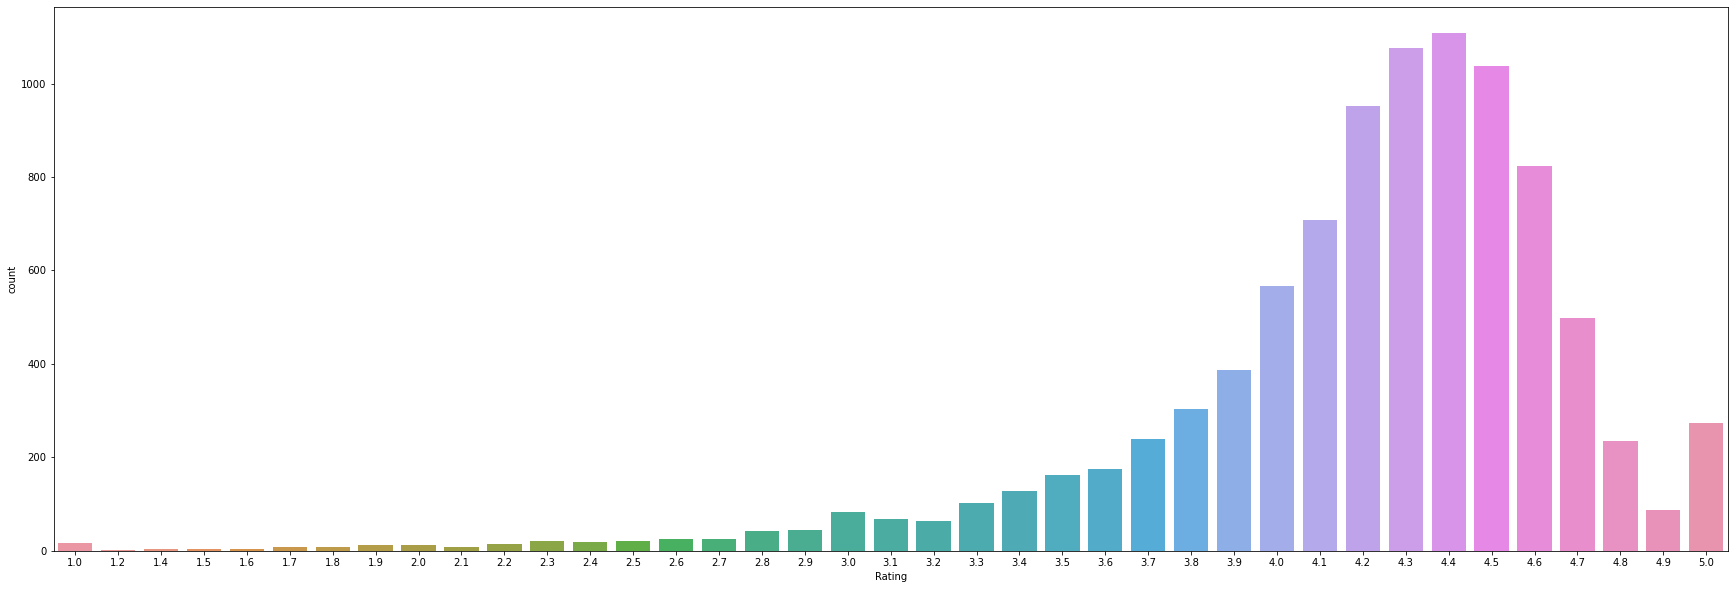

In [33]:
plt.figure(figsize=(30,10))
fig = sns.countplot(x=googleplaystore_data['Rating'])

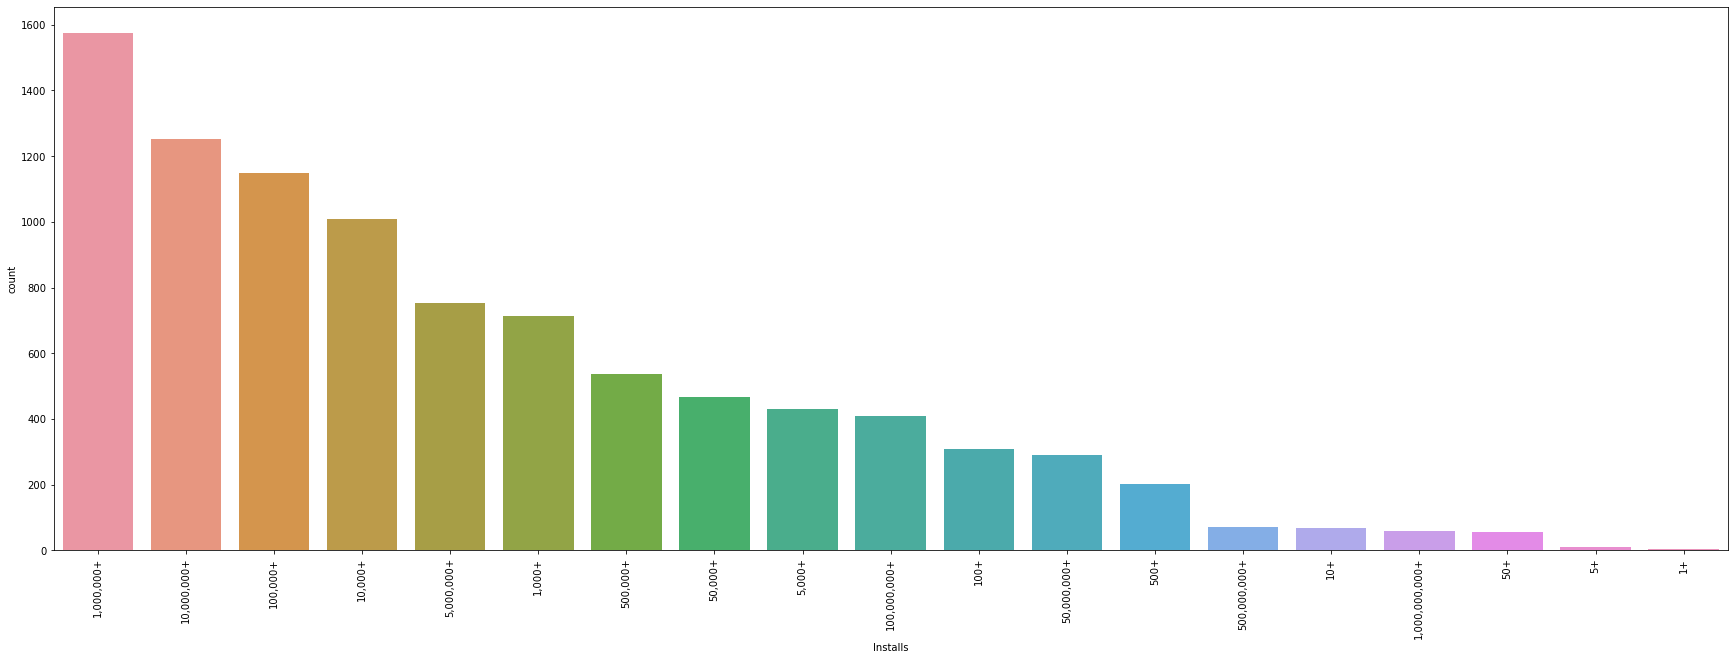

In [34]:
plt.figure(figsize=(30,10))
fig = sns.countplot(x=googleplaystore_data['Installs'],order=googleplaystore_data['Installs'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

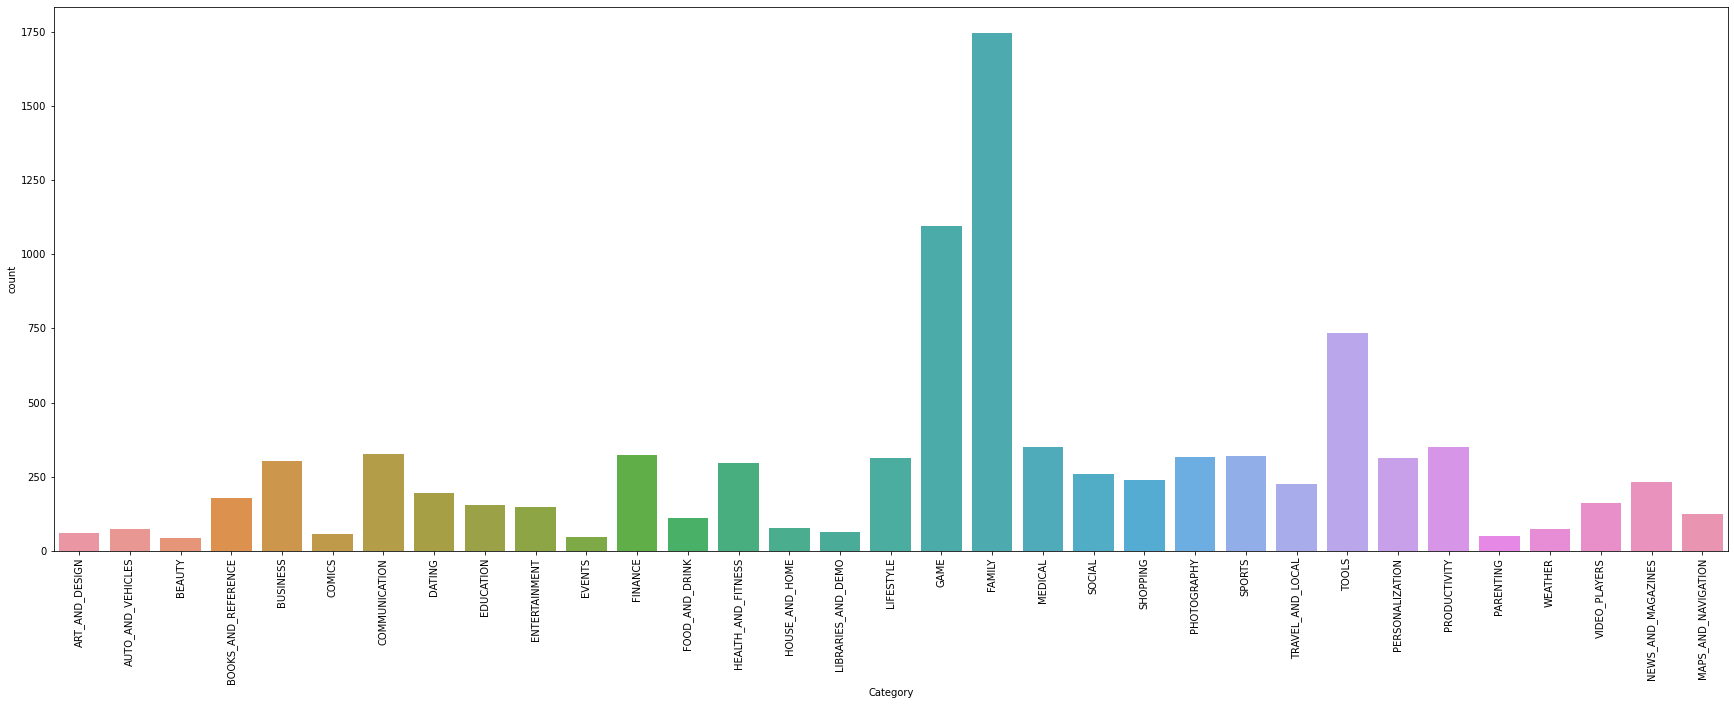

In [35]:
plt.figure(figsize=(30,10))
fig = sns.countplot(x=googleplaystore_data['Category'])
plt.xticks(rotation=90)
plt.show()

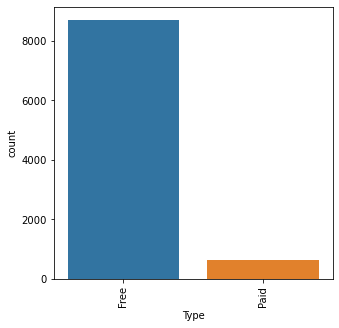

In [36]:
plt.figure(figsize=(5,5))
fig = sns.countplot(x=googleplaystore_data['Type'])
plt.xticks(rotation=90)
plt.show()

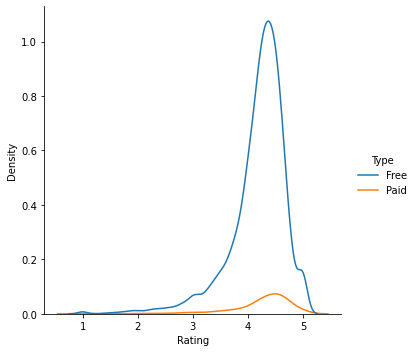

In [37]:
sns.displot(googleplaystore_data, x="Rating", hue='Type',kind="kde")

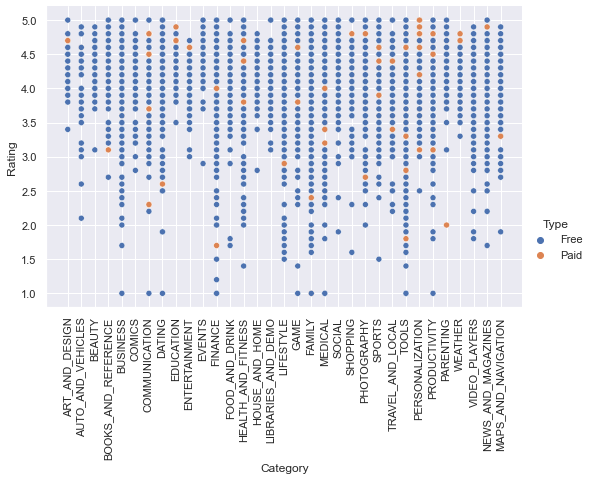

In [48]:
sns.relplot(x="Category", y="Rating", hue="Type",data=googleplaystore_data, height=5, aspect=1.5)
plt.xticks(rotation=90)
plt.show()

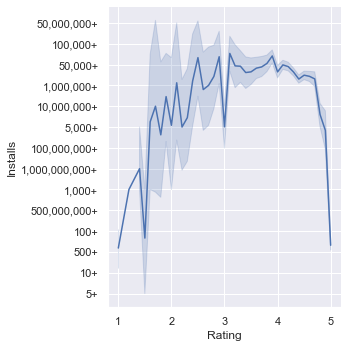

In [46]:
sns.relplot(x="Rating", y="Installs", kind="line",data=googleplaystore_data)

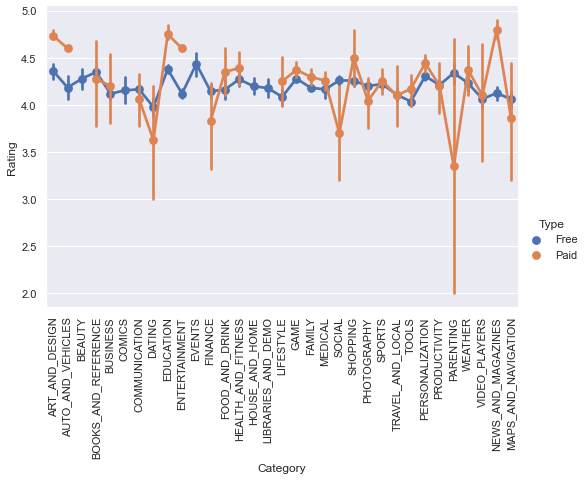

In [49]:
sns.catplot(x="Category", y="Rating", hue="Type", kind="point", data=googleplaystore_data, height=5, aspect=1.5)
plt.xticks(rotation=90)
plt.show()